In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
%matplotlib inline

In [2]:
f_csv = [f for f in os.listdir() if f.endswith('.csv')]
print(f_csv)

['stroke-prediction-dataset.csv']


In [3]:
df = pd.read_csv('./stroke-prediction-dataset.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.duplicated().sum()

0

In [7]:
#предварительная обработка данных
#Проверьте данные на наличие пропущенных значений и обработайте их, 
#используя подходящий метод (например, заполнение средним значением или 0). 
#Также проверьте, нет ли в данных аномалий или выбросов, которые могут повлиять на точность вашей модели.

In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
df.rename(columns={'Residence_type': 'residence_type'}, inplace = True)

In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
categorical_columns = list(df.dtypes[df.dtypes=='object'].index)
categorical_columns

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [13]:
for col in categorical_columns:
    df[col] = df[col].str.lower()

In [14]:
#в данном датасете все числовые колонки имеют числовой тип данных, так что все ок
#целевая колонка иметт числовой тип данных поэтому пропускаем этап перевода в числовой тип данных

In [15]:
#заполним нули в колонке bmi
df['bmi'].mode().values[0]

28.7

<AxesSubplot:ylabel='bmi'>

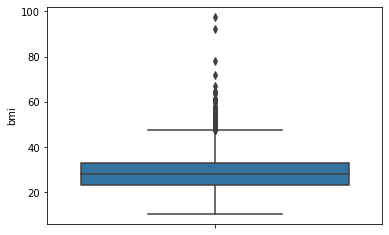

In [16]:
#проверим много ли выбросов в колонке bmi если не много - заменим нулы на mean
sns.boxplot(y=df['bmi'])
#так как линия не везде сплошная можем сделать вывод что outliers не так много относительно

In [17]:
not_null_bmi = df[~df['bmi'].isna()]
not_null_bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.6,formerly smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.5,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.0,never smoked,1
5,56669,male,81.0,0,0,yes,private,urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,female,13.0,0,0,no,children,rural,103.08,18.6,unknown,0
5106,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.0,never smoked,0
5107,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.6,never smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.6,formerly smoked,0


In [18]:
bmi_mean = not_null_bmi['bmi'].mean()

In [19]:
#заполняем средним знаечением нулы
df['bmi']=df['bmi'].fillna(bmi_mean)

In [20]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
############################  Train, Selection, Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df_train, df_test_and_valid = train_test_split(df, test_size=0.4, random_state=2)

In [24]:
print(len(df_train), len(df_test_and_valid))

3066 2044


In [25]:
df_test, df_val = train_test_split(df_test_and_valid, test_size=0.5, random_state=12)

In [26]:
print(len(df_train), len(df_test), len(df_val))

3066 1022 1022


In [27]:
df_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
4320,30002,male,44.0,1,0,yes,self-employed,rural,83.59,24.1,never smoked,0
4548,53426,male,49.0,0,0,yes,private,rural,58.42,32.8,formerly smoked,0
1161,47414,female,71.0,1,0,yes,private,urban,116.76,32.9,formerly smoked,0
3082,66270,female,57.0,0,0,yes,private,rural,69.40,24.0,unknown,0
2858,55462,male,6.0,0,0,no,children,urban,123.39,15.2,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1978,21724,female,42.0,0,0,yes,self-employed,urban,124.34,34.7,formerly smoked,0
457,17718,female,33.0,1,0,yes,private,urban,74.44,45.2,smokes,0
764,45283,female,31.0,0,0,yes,private,urban,106.18,27.0,smokes,0
5006,70593,female,38.0,0,0,yes,private,rural,183.43,38.1,formerly smoked,0


In [28]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [29]:
df_test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30002,male,44.0,1,0,yes,self-employed,rural,83.59,24.1,never smoked,0
1,53426,male,49.0,0,0,yes,private,rural,58.42,32.8,formerly smoked,0
2,47414,female,71.0,1,0,yes,private,urban,116.76,32.9,formerly smoked,0
3,66270,female,57.0,0,0,yes,private,rural,69.40,24.0,unknown,0
4,55462,male,6.0,0,0,no,children,urban,123.39,15.2,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,21724,female,42.0,0,0,yes,self-employed,urban,124.34,34.7,formerly smoked,0
1018,17718,female,33.0,1,0,yes,private,urban,74.44,45.2,smokes,0
1019,45283,female,31.0,0,0,yes,private,urban,106.18,27.0,smokes,0
1020,70593,female,38.0,0,0,yes,private,rural,183.43,38.1,formerly smoked,0


In [30]:
y_train = df_train.stroke.values
y_test = df_test.stroke.values
y_val = df_val.stroke.values

In [31]:
del df_train['stroke']
del df_test['stroke']
del df_val['stroke']

In [32]:
df_train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,1953,female,0.72,0,0,no,children,rural,112.19,20.1,unknown
1,27664,female,47.00,0,0,yes,private,urban,86.99,28.9,smokes
2,29217,female,65.00,1,0,yes,private,rural,75.70,41.8,unknown
3,47924,male,24.00,0,0,no,private,urban,59.28,43.2,never smoked
4,26366,female,27.00,0,0,no,private,rural,103.35,28.1,formerly smoked
...,...,...,...,...,...,...,...,...,...,...,...
3061,6540,female,41.00,0,0,yes,private,rural,93.67,35.9,unknown
3062,23565,male,34.00,0,0,yes,private,urban,85.57,26.8,unknown
3063,70625,male,18.00,0,0,no,private,urban,79.35,23.6,unknown
3064,14872,male,45.00,1,0,yes,self-employed,rural,239.19,52.5,unknown


In [33]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
######################3) EDA
#Проверить пропущенные значения
#Изучить целевую переменную (отток)
#Рассмотреть числовые и категориальные переменные

In [35]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [36]:
df.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [37]:
global_stroke_rate = df.stroke.mean()
print(global_stroke_rate)

0.0487279843444227


In [38]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [158]:
numerical = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [40]:
categorical = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [41]:
df[categorical].nunique()

gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [42]:
#############Важность признаков (взаимная информация)

In [43]:
df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,male,female,male,female,female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,yes,yes,yes,yes,yes
work_type,private,self-employed,private,private,self-employed
residence_type,urban,rural,rural,urban,rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.893237,32.5,34.4,24.0


In [44]:
#коэффициент инсульта
stroke_female = df[df.gender=='female'].stroke.mean()
stroke_female

0.047094188376753505

In [45]:
stroke_male = df[df.gender=='male'].stroke.mean()
stroke_male

0.05106382978723404

In [46]:
global_stroke = df.stroke.mean()
global_stroke
##видим что пол не сильно влияет на риск инсульта

0.0487279843444227

In [47]:
df.ever_married.value_counts()

yes    3353
no     1757
Name: ever_married, dtype: int64

In [48]:
stroke_ever_married = df[df.ever_married=='yes'].stroke.mean()
stroke_ever_married

0.0656128839844915

In [49]:
stroke_never_married = df[df.ever_married == 'no'].stroke.mean()
stroke_never_married

0.016505406943653957

In [50]:
#risk ratio (вероятность того, что человек который когда либо был женат будет подвержен риску инсульта 1,35)
stroke_ever_married/global_stroke

1.3465134022520142

In [51]:
stroke_never_married/global_stroke

0.33872541960671376

In [52]:
from IPython.display import display

In [53]:
for col in categorical:
    print(col)
    df_group =  df.groupby(col).stroke.agg(['mean','count'])
    df_group['risk'] =df_group['mean']/global_stroke
    display(df_group)
    print()
    print()

gender


,mean,count,risk
gender,,,
female,0.047094,2994,0.966471
male,0.051064,2115,1.047936
other,0.000000,1,0.000000




ever_married


,mean,count,risk
ever_married,,,
no,0.016505,1757,0.338725
yes,0.065613,3353,1.346513




work_type


,mean,count,risk
work_type,,,
children,0.002911,687,0.059744
govt_job,0.050228,657,1.030790
never_worked,0.000000,22,0.000000
private,0.050940,2925,1.045399
self-employed,0.079365,819,1.628737




residence_type


,mean,count,risk
residence_type,,,
rural,0.045346,2514,0.930596
urban,0.052003,2596,1.067212




smoking_status


,mean,count,risk
smoking_status,,,
formerly smoked,0.079096,885,1.623216
never smoked,0.047569,1892,0.976209
smokes,0.053232,789,1.092431
unknown,0.030440,1544,0.624701


In [54]:
#########   Mutual information

In [55]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never smoked,1


In [56]:
from sklearn.metrics import mutual_info_score

In [57]:
mutual_info_score(df.work_type, df.stroke)

0.006825427206957342

In [58]:
mutual_info_score(df.smoking_status, df.stroke)

0.002750494543529103

In [59]:
def calculate_mi(series):
    return mutual_info_score(series, df.stroke)

In [60]:
df[categorical].apply(calculate_mi).sort_values(ascending = False)

ever_married      0.006950
work_type         0.006825
smoking_status    0.002750
residence_type    0.000120
gender            0.000051
dtype: float64

In [61]:
###  теперь важность числовых колонок - коррелцию сделаем

In [62]:
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

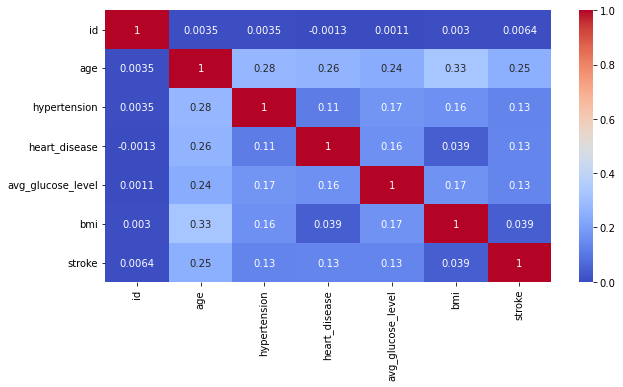

In [63]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.show()

In [64]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

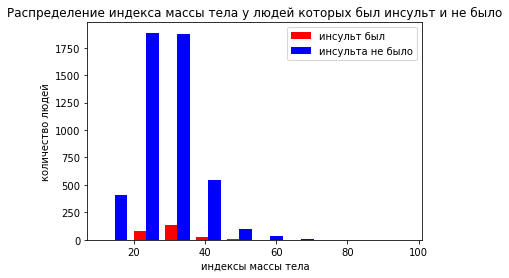

In [65]:
bmi_yes = df[df.stroke==1].bmi
bmi_no = df[df.stroke == 0].bmi

plt.hist([bmi_yes, bmi_no], color = ['red', 'blue'], label = ['инсульт был', 'инсульта не было'])
plt.title('Распределение индекса массы тела у людей которых был инсульт и не было')
plt.xlabel('индексы массы тела')
plt.ylabel('количество людей')
plt.legend()
plt.show()

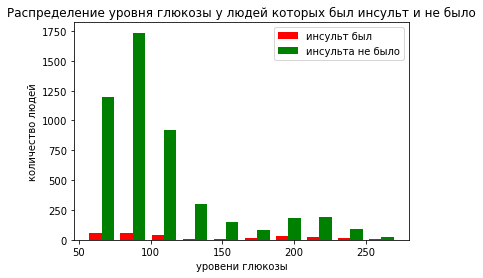

In [66]:
avg_glucose_yes = df[df.stroke == 1].avg_glucose_level
avg_glucose_no = df[df.stroke == 0].avg_glucose_level

plt.hist([avg_glucose_yes, avg_glucose_no], color = ['red', 'green'], label = ['инсульт был', 'инсульта не было'])
plt.title('Распределение уровня глюкозы у людей которых был инсульт и не было')
plt.xlabel('уровени глюкозы')
plt.ylabel('количество людей')
plt.legend()
plt.show()

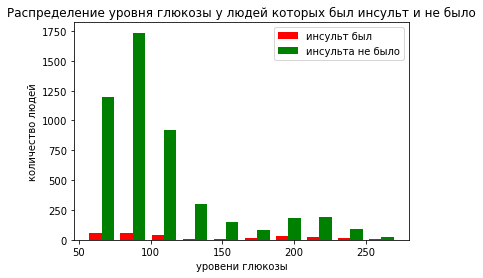

In [67]:
heart_disease_yes = df[df.stroke==1].avg_glucose_level
heart_disease_no = df[df.stroke == 0].avg_glucose_level

plt.hist([avg_glucose_yes, avg_glucose_no], color = ['red', 'green'], label = ['инсульт был', 'инсульта не было'])
plt.title('Распределение уровня глюкозы у людей которых был инсульт и не было')
plt.xlabel('уровени глюкозы')
plt.ylabel('количество людей')
plt.legend()
plt.show()

In [68]:
#### One-hot encoding

In [69]:
from sklearn.feature_extraction import DictVectorizer

In [70]:
df_train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
0,1953,female,0.72,0,0,no,children,rural,112.19,20.1,unknown
1,27664,female,47.00,0,0,yes,private,urban,86.99,28.9,smokes
2,29217,female,65.00,1,0,yes,private,rural,75.70,41.8,unknown
3,47924,male,24.00,0,0,no,private,urban,59.28,43.2,never smoked
4,26366,female,27.00,0,0,no,private,rural,103.35,28.1,formerly smoked


In [71]:
train_dict = df_train[categorical+numerical].to_dict(orient = 'records')
train_dict[0]

{'gender': 'female',
 'ever_married': 'no',
 'work_type': 'children',
 'residence_type': 'rural',
 'smoking_status': 'unknown',
 'age': 0.72,
 'hypertension': 0,
 'heart_disease': 0,
 'avg_glucose_level': 112.19,
 'bmi': 20.1}

In [72]:
dv = DictVectorizer(sparse=False)

In [73]:
X_train = dv.fit_transform(train_dict)
X_train[0]

array([  0.72, 112.19,  20.1 ,   1.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ,
         0.  ,   0.  ,   0.  ,   0.  ])

In [74]:
dv.get_feature_names_out()

array(['age', 'avg_glucose_level', 'bmi', 'ever_married=no',
       'ever_married=yes', 'gender=female', 'gender=male',
       'heart_disease', 'hypertension', 'residence_type=rural',
       'residence_type=urban', 'smoking_status=formerly smoked',
       'smoking_status=never smoked', 'smoking_status=smokes',
       'smoking_status=unknown', 'work_type=children',
       'work_type=govt_job', 'work_type=never_worked',
       'work_type=private', 'work_type=self-employed'], dtype=object)

In [75]:
categorical+numerical

['gender',
 'ever_married',
 'work_type',
 'residence_type',
 'smoking_status',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi']

In [76]:
val_dict = df_val[categorical+numerical].to_dict(orient='records')
val_dict[0]

{'gender': 'male',
 'ever_married': 'yes',
 'work_type': 'private',
 'residence_type': 'rural',
 'smoking_status': 'never smoked',
 'age': 49.0,
 'hypertension': 0,
 'heart_disease': 0,
 'avg_glucose_level': 78.04,
 'bmi': 37.9}

In [77]:
X_val = dv.transform(val_dict)
X_val[0]

array([49.  , 78.04, 37.9 ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ])

In [78]:
X_val.shape

(1022, 20)

In [79]:
#### logistic regression обучение модели

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
model = LogisticRegression()
model.fit(X_train, y_train)

D:\able\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
model.coef_ ## w1, w2

array([[ 6.53586990e-02,  3.62439459e-03,  9.18102161e-05,
        -1.02231392e+00, -1.23139326e+00, -1.17743014e+00,
        -1.07627704e+00,  2.18682565e-01,  4.07614577e-01,
        -1.15869436e+00, -1.09501282e+00, -4.71782122e-01,
        -7.07833030e-01, -5.21818857e-01, -5.52273178e-01,
        -5.86680884e-01, -4.69077288e-01, -4.63697590e-02,
        -4.51694621e-01, -6.99884633e-01]])

In [83]:
model.intercept_ ## bias

array([-2.59759617])

In [84]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
model.predict_proba(X_val)[:, 1]

array([0.02332599, 0.01188264, 0.01350777, ..., 0.00484313, 0.01101507,
       0.15698644])

In [86]:
y_val_pred = model.predict_proba(X_val)[:, 1]
y_val_pred

array([0.02332599, 0.01188264, 0.01350777, ..., 0.00484313, 0.01101507,
       0.15698644])

In [87]:
stroke_pred = (y_val_pred>=0.39)

In [88]:
stroke_pred

array([False, False, False, ..., False, False, False])

In [89]:
df_val[stroke_pred]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status
251,65955,male,81.0,1,1,no,private,rural,220.64,30.0,never smoked
921,68627,male,80.0,1,1,yes,private,urban,175.29,31.5,formerly smoked


In [90]:
y_val==stroke_pred ##на сколько совпали предсказанные данные об инсульте с изначальными данными

array([ True,  True,  True, ...,  True,  True,  True])

In [91]:
(y_val==stroke_pred).mean() ##доля правды в предсказаниях accuracy of the model

0.9481409001956947

In [92]:
#table to see the results:
df_pred = pd.DataFrame()
df_pred['Probability']=y_val_pred
df_pred['Predicted']=stroke_pred.astype(int)
df_pred['Actual'] = y_val
df_pred


,Probability,Predicted,Actual
0,0.023326,0,0
1,0.011883,0,0
2,0.013508,0,0
3,0.136453,0,1
4,0.001700,0,0
...,...,...,...
1017,0.003686,0,0
1018,0.003524,0,0
1019,0.004843,0,0
1020,0.011015,0,0


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [94]:
accuracy = accuracy_score(df_pred['Actual'], df_pred['Predicted'])
precision = precision_score(df_pred['Actual'], df_pred['Predicted'])
recall = recall_score(df_pred['Actual'], df_pred['Predicted'])
f1 = f1_score(df_pred['Actual'], df_pred['Predicted'])

In [140]:
model_name = 'Logistic Regression Base t=0.39'
metrics_df = pd.DataFrame(columns = ['Model name', 'Accuracy', 'Precision', 'Recall', 'F1 score'])
metrics_df = pd.concat([metrics_df, pd.DataFrame([
    {'Model name': model_name,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1 score': f1}
])], ignore_index=True)
metrics_df ##F1 score - комбинация Precision and Recall, если больше 0,9 - очень хороший результат, 
#0,8-0,9 --хороший, 0,5 и выше - нормальный результат. В нашем случае F1 score плохойы

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364


In [130]:
metrics_df= metrics_df.drop('F1', axis=1)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base,0.948141,0.5,0.018868,0.036364


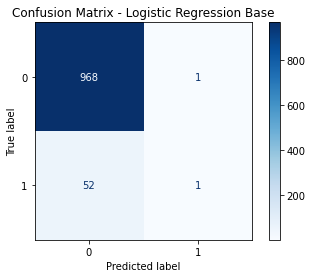

In [96]:
# Confusuion matrix
my_conf_matrix = confusion_matrix(df_pred['Actual'], df_pred['Predicted'])
disp = ConfusionMatrixDisplay(confusion_matrix=my_conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.show;

In [97]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'age': 0.065,
 'avg_glucose_level': 0.004,
 'bmi': 0.0,
 'ever_married=no': -1.022,
 'ever_married=yes': -1.231,
 'gender=female': -1.177,
 'gender=male': -1.076,
 'heart_disease': 0.219,
 'hypertension': 0.408,
 'residence_type=rural': -1.159,
 'residence_type=urban': -1.095,
 'smoking_status=formerly smoked': -0.472,
 'smoking_status=never smoked': -0.708,
 'smoking_status=smokes': -0.522,
 'smoking_status=unknown': -0.552,
 'work_type=children': -0.587,
 'work_type=govt_job': -0.469,
 'work_type=never_worked': -0.046,
 'work_type=private': -0.452,
 'work_type=self-employed': -0.7}

In [98]:
### Improving the model

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
## сделаем функции включающие все манипуляции и стадии
def split_data(df):
    df_train, df_test_and_validation = train_test_split(df, test_size = 0.4, random_state=2)
    df_test, df_val = train_test_split(df_test_and_validation, test_size=0.5, random_state=2)
    y_train = df_train.stroke.values
    y_test = df_test.stroke.values
    y_val = df_val.stroke.values
    del df_train['stroke']
    del df_test['stroke']
    del df_val['stroke']
    return df_train, y_train, df_test, y_test, df_val, y_val

In [101]:
def prepare_data(df_train, df_val, features):
    dicts_train_temp = df_train[features].to_dict(orient = 'records')
    dicts_val_temp = df_val[features].to_dict(orient = 'records')
    dv_temp = DictVectorizer(sparse=False)
    X_train_temp = dv_temp.fit_transform(dicts_train_temp)
    X_val_temp = dv_temp.transform(dicts_val_temp)
    return X_train_temp, X_val_temp

In [102]:
def train_model(X_train, y_train):
    my_model = LogisticRegression()
    my_model.fit(X_train, y_train)
    return my_model

In [126]:
def model_eval(model, Model_name, X_val, y_val, treshold):
    y_pred = model.predict_proba(X_val)[:, 1]
    stroke_decision = (y_pred>=treshold).astype(int)
    accuracy = accuracy_score(y_val, stroke_decision)
    precision = precision_score(y_val, stroke_decision)
    recall = recall_score(y_val, stroke_decision)
    f1 = f1_score(y_val, stroke_decision)
    res_df = pd.DataFrame([{'Model name': Model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 score': f1}])
    return res_df, stroke_decision, y_pred

In [104]:
### поиск лучшего threshold

In [105]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from numpy import arange

In [106]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

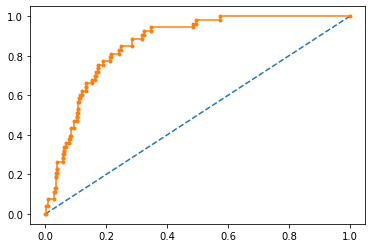

In [107]:
pyplot.plot([0, 1], [0, 1], linestyle = '--', label = 'No skill');
pyplot.plot( fpr, tpr, marker = '.', label = 'Logistic');

In [108]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype(int)

thresholds = arange(0, 1, 0.001)
scores = [f1_score(y_val, to_labels(y_val_pred, t)) for t in thresholds]
#print(scores)

ix = argmax(scores)
print('Best threshold =%.3f, F1-score = %.5f' % (thresholds[ix], scores[ix]))

Best threshold =0.120, F1-score = 0.32512


In [109]:
## применим лучший threshold на новой модели:

In [144]:
X_train, X_val = prepare_data(df_train, df_val, categorical+numerical)
new_model = train_model(X_train, y_train)
res_df_new, stroke_decision_new, y_pred_new = model_eval(new_model, 'Logistic Regression model t=0.060', X_train, y_train, 0.060)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683


In [ ]:
#### Feature engineering

In [159]:
numerical_wo_bmi = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level'] ##bmi корреляция меньше всего, так что попробуем удалить его

In [161]:
X_train, X_val = prepare_data(df_train, df_val, categorical+numerical_wo_bmi)
new_model = train_model(X_train, y_train)
res_df_new, stroke_decision_new, y_pred_new = model_eval(new_model, 'LR model t=0.120 w/o bmi', X_train, y_train, 0.120)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683
3,LR model t=0.060 w/o bmi,0.761905,0.143558,0.785235,0.242739
4,LR model t=0.120 w/o bmi,0.86758,0.185819,0.510067,0.272401


In [162]:
df[categorical].apply(calculate_mi).sort_values(ascending=False)[:-1]

ever_married      0.006950
work_type         0.006825
smoking_status    0.002750
residence_type    0.000120
dtype: float64

In [168]:
features_wo_gender = list(df[categorical].apply(calculate_mi).sort_values(ascending=False)[:-1].index)
features_wo_gender

['ever_married', 'work_type', 'smoking_status', 'residence_type']

In [169]:
features_wo_gender+numerical_wo_bmi

['ever_married',
 'work_type',
 'smoking_status',
 'residence_type',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level']

In [172]:
X_train, X_val = prepare_data(df_train, df_val, features_wo_gender+numerical_wo_bmi)
new_model = train_model(X_train, y_train)
res_df_new, stroke_decision_new, y_pred_new = model_eval(new_model, 'LR model t=0.060 w/o bmi,gender', X_train, y_train, 0.060)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683
3,LR model t=0.060 w/o bmi,0.761905,0.143558,0.785235,0.242739
4,LR model t=0.120 w/o bmi,0.86758,0.185819,0.510067,0.272401
5,"LR model t=0.060 w/o bmi,gender",0.761905,0.143558,0.785235,0.242739


In [174]:
# уберем еще один категориальный признак который влияет меньше всего
features_minus_gender_resid = list(df[categorical].apply(calculate_mi).sort_values(ascending=False)[:-2].index)
features_minus_gender_resid

['ever_married', 'work_type', 'smoking_status']

In [177]:
X_train, X_val = prepare_data(df_train, df_val, features_minus_gender_resid+numerical_wo_bmi)
new_model = train_model(X_train, y_train)
res_df_new, stroke_decision_new, y_pred_new = model_eval(new_model, 'LR t=0.06 w/o bmi,gender, residence type', X_train, y_train, 0.060)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683
3,LR model t=0.060 w/o bmi,0.761905,0.143558,0.785235,0.242739
4,LR model t=0.120 w/o bmi,0.86758,0.185819,0.510067,0.272401
5,"LR model t=0.060 w/o bmi,gender",0.761905,0.143558,0.785235,0.242739
6,"LR t=0.06 w/o bmi,gender, residence type",0.757339,0.139394,0.771812,0.23614


In [176]:
metrics_df = metrics_df.drop(6, axis=0)

In [178]:
## min-max normalisation 
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [179]:
df_copy=df.copy()
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,28.893237,never smoked,0
5106,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.000000,never smoked,0
5107,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.600000,never smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.600000,formerly smoked,0


In [180]:
for col in numerical:
    min_col = df_copy[col].min()
    max_col = df_copy[col].max()
    df_copy[col] = (df_copy[col]-min_col)/(max_col-min_col)
    

In [181]:
df_copy[numerical]

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,0.816895,0.0,1.0,0.801265,0.301260
1,0.743652,0.0,0.0,0.679023,0.212981
2,0.975586,0.0,1.0,0.234512,0.254296
3,0.597168,0.0,0.0,0.536008,0.276060
4,0.963379,1.0,0.0,0.549349,0.156930
...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.212981
5106,0.987793,0.0,0.0,0.323516,0.340206
5107,0.426270,0.0,0.0,0.128658,0.232532
5108,0.621582,0.0,0.0,0.513203,0.175258


In [182]:
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,0.816895,0.0,1.0,yes,private,urban,0.801265,0.301260,formerly smoked,1
1,51676,female,0.743652,0.0,0.0,yes,self-employed,rural,0.679023,0.212981,never smoked,1
2,31112,male,0.975586,0.0,1.0,yes,private,rural,0.234512,0.254296,never smoked,1
3,60182,female,0.597168,0.0,0.0,yes,private,urban,0.536008,0.276060,smokes,1
4,1665,female,0.963379,1.0,0.0,yes,self-employed,rural,0.549349,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,0.975586,1.0,0.0,yes,private,urban,0.132167,0.212981,never smoked,0
5106,44873,female,0.987793,0.0,0.0,yes,self-employed,urban,0.323516,0.340206,never smoked,0
5107,19723,female,0.426270,0.0,0.0,yes,self-employed,rural,0.128658,0.232532,never smoked,0
5108,37544,male,0.621582,0.0,0.0,yes,private,rural,0.513203,0.175258,formerly smoked,0


In [183]:
## попробуем другие модели
from sklearn import metrics, feature_selection,  neighbors, model_selection, preprocessing, linear_model, svm, ensemble

In [185]:
seed = 123
models = [
('k_nearest_neighbors', neighbors.KNeighborsClassifier()),
('logistic_regression', linear_model.LogisticRegression(random_state=seed)),
('support_vector_machines', svm.SVC(random_state=seed)),
('random_forest', ensemble.RandomForestClassifier(random_state=seed)),
('gradient_boosting', ensemble.GradientBoostingClassifier(random_state=seed)),]

def run_experiments(models, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val, seed=seed):
    results = dict()
    for name, model in models:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        f1_score = metrics.f1_score(y_test, predictions)
        print(f"{name} --> acc = {accuracy * 100}%, f1 = {f1_score}")
        results[name] = accuracy

results = run_experiments(models=models)

k_nearest_neighbors --> acc = 94.32485322896281%, f1 = 0.03333333333333333
logistic_regression --> acc = 94.81409001956948%, f1 = 0.0
support_vector_machines --> acc = 94.81409001956948%, f1 = 0.0
random_forest --> acc = 94.12915851272015%, f1 = 0.0625
gradient_boosting --> acc = 94.03131115459882%, f1 = 0.0


In [187]:
### выбираем модель с threshold =0.12 и проверим еще раз метрики чтобы убедится что мы берем именно ту модель
X_train, X_val = prepare_data(df_train, df_val, categorical+numerical)
final_model = train_model(X_train, y_train)
res_df_new, stroke_decision_new, y_pred_new = model_eval(final_model, 'Logistic Regression model t=0.120', X_val, y_val, 0.120)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683
3,LR model t=0.060 w/o bmi,0.761905,0.143558,0.785235,0.242739
4,LR model t=0.120 w/o bmi,0.86758,0.185819,0.510067,0.272401
5,"LR model t=0.060 w/o bmi,gender",0.761905,0.143558,0.785235,0.242739
6,"LR t=0.06 w/o bmi,gender, residence type",0.757339,0.139394,0.771812,0.23614
7,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
8,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535


In [192]:
X_train, X_test = prepare_data(df_train, df_test, categorical+numerical)
#new_model = train_model(X_train, y_train)
res_df_new, stroke_decision_new, y_pred_new = model_eval(final_model, 'LR model t=0.120 Test data', X_test, y_test, 0.120)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683
3,LR model t=0.060 w/o bmi,0.761905,0.143558,0.785235,0.242739
4,LR model t=0.120 w/o bmi,0.86758,0.185819,0.510067,0.272401
5,"LR model t=0.060 w/o bmi,gender",0.761905,0.143558,0.785235,0.242739
6,"LR t=0.06 w/o bmi,gender, residence type",0.757339,0.139394,0.771812,0.23614
7,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
8,LR model t=0.120 Test data,0.872798,0.201439,0.595745,0.301075


In [190]:
# на тестовых данных метрики даже лучше вышли

In [194]:
## train on df_train + df_val
df_train_test = pd.concat([df_train, df_test], ignore_index=True)
y_train_test = np.concatenate((y_train, y_test), axis=0)

X_train_test, X_valid = prepare_data(df_train_test, df_val, categorical+numerical)
train_test_merged_model = train_model(X_train_test, y_train_test)
res_df_new, stroke_decision_new, y_pred_new = model_eval(train_test_merged_model, 'LR model t=0.120 (Train+Test) data', X_valid, y_val, 0.120)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683
3,LR model t=0.060 w/o bmi,0.761905,0.143558,0.785235,0.242739
4,LR model t=0.120 w/o bmi,0.86758,0.185819,0.510067,0.272401
5,"LR model t=0.060 w/o bmi,gender",0.761905,0.143558,0.785235,0.242739
6,"LR t=0.06 w/o bmi,gender, residence type",0.757339,0.139394,0.771812,0.23614
7,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
8,LR model t=0.120 Test data,0.872798,0.201439,0.595745,0.301075
9,LR model t=0.120 (Train+Test) data,0.873777,0.220588,0.566038,0.31746


In [198]:
## подкорректируем функцию чтобы выдал нам DictVectorizer чтобы далее использовать на случай отсутсвтия каких либо признаков
def prepare_data_2(df_train, df_val, features):
    dicts_train_temp = df_train[features].to_dict(orient = 'records')
    dicts_val_temp = df_val[features].to_dict(orient = 'records')
    dv_temp = DictVectorizer(sparse=False)
    X_train_temp = dv_temp.fit_transform(dicts_train_temp)
    X_val_temp = dv_temp.transform(dicts_val_temp)
    return X_train_temp, X_val_temp, dv_temp

In [199]:
# объединим теперь и с валидационными данными в итоге получается обучаем модель на всех имеющихся данных 
df_train_test_val = pd.concat([df_train, df_test, df_val], ignore_index=True)
y_train_test_val = np.concatenate((y_train, y_test, y_val), axis=0)

X_train_test_val, X_valid, dv_model = prepare_data_2(df_train_test_val, df_val, categorical+numerical)
my_final_model = train_model(X_train_test_val, y_train_test_val)
res_df_new, stroke_decision_new, y_pred_new = model_eval(my_final_model, 'LR model t=0.120 (Train+Test+Valid) data', X_valid, y_val, 0.120)
metrics_df = pd.concat([metrics_df, res_df_new], ignore_index=True)
metrics_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Logistic Regression Base t=0.39,0.948141,0.5,0.018868,0.036364
1,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
2,Logistic Regression model t=0.060,0.758643,0.140948,0.778523,0.238683
3,LR model t=0.060 w/o bmi,0.761905,0.143558,0.785235,0.242739
4,LR model t=0.120 w/o bmi,0.86758,0.185819,0.510067,0.272401
5,"LR model t=0.060 w/o bmi,gender",0.761905,0.143558,0.785235,0.242739
6,"LR t=0.06 w/o bmi,gender, residence type",0.757339,0.139394,0.771812,0.23614
7,Logistic Regression model t=0.120,0.866601,0.18599,0.516779,0.273535
8,LR model t=0.120 Test data,0.872798,0.201439,0.595745,0.301075
9,LR model t=0.120 (Train+Test) data,0.873777,0.220588,0.566038,0.31746


In [200]:
## сохранение модели
import pickle

In [201]:
model_file_path = 'D:\BU AI\Logistic regression project/lr_model_stroke_prediction.sav' # .pickle/.pkl
pickle.dump(my_final_model, open(model_file_path, 'wb'))


In [202]:
encoding_model_filepath = 'D:\BU AI\Logistic regression project/encoding_model_stroke_prediction.sav'
pickle.dump(dv_model, open(encoding_model_filepath, 'wb'))

In [203]:
# загрузка модели из файла
loaded_model = pickle.load(open(model_file_path, 'rb'))
loaded_encoding_model = pickle.load(open(encoding_model_filepath, 'rb'))

In [204]:
res_model_df, y_pred_class, y_pred_proba = model_eval(loaded_model, 'Loaded model from file', X_valid, y_val, 0.120)
res_model_df

,Model name,Accuracy,Precision,Recall,F1 score
0,Loaded model from file,0.868885,0.212766,0.566038,0.309278


In [205]:
numerical

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [206]:
categorical

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

In [210]:
df[categorical].nunique()

gender            3
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [211]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never smoked,1


In [212]:
df['gender'].value_counts()

female    2994
male      2115
other        1
Name: gender, dtype: int64

In [213]:
df['gender'].unique()

array(['male', 'female', 'other'], dtype=object)

In [222]:
le_enc_cols = ['ever_married'] ## заменим на 0 и 1
#gender_map = {'male': 0, 'female': 1,}
y_n_map = {'yes':1, 'no': 0}
from sklearn.preprocessing import MinMaxScaler
def predict_stroke_minmax(model, encoding_model, df_input, treshold):
    scaler = MinMaxScaler()
    
    df_original = df_input.copy()
    df_input[numerical]=scaler.fit_transform(df_input[numerical])
    
    for col in le_enc_cols:
        df_input[col] = df_input[col].map(y_n_map)
    
    dict_df = df_input[categorical+numerical].to_dict(orient = 'records')
    X = encoding_model.transform(dict_df)
    y_pred_proba = model.predict_proba(X)[:,1]
    stroke_decision = (y_pred_proba>=treshold).astype(int)
    df_original['stroke decision'] = stroke_decision
    df_original['stroke predicted probability'] = y_pred_proba
    return df_original
    
    

In [225]:
from sklearn.preprocessing import MinMaxScaler
res_temp_minmaxed = predict_stroke_minmax(loaded_model, loaded_encoding_model, df, 0.12)
res_temp_minmaxed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke decision,stroke predicted probability
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly smoked,1,0,0.006726
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never smoked,1,0,0.002146
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never smoked,1,0,0.004992
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1,0,0.004363
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never smoked,1,0,0.003367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,28.893237,never smoked,0,0,0.005205
5106,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.000000,never smoked,0,0,0.002413
5107,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.600000,never smoked,0,0,0.002097
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.600000,formerly smoked,0,0,0.003986


In [224]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,0,1,yes,private,urban,228.69,36.600000,formerly smoked,1
1,51676,female,61.0,0,0,yes,self-employed,rural,202.21,28.893237,never smoked,1
2,31112,male,80.0,0,1,yes,private,rural,105.92,32.500000,never smoked,1
3,60182,female,49.0,0,0,yes,private,urban,171.23,34.400000,smokes,1
4,1665,female,79.0,1,0,yes,self-employed,rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,female,80.0,1,0,yes,private,urban,83.75,28.893237,never smoked,0
5106,44873,female,81.0,0,0,yes,self-employed,urban,125.20,40.000000,never smoked,0
5107,19723,female,35.0,0,0,yes,self-employed,rural,82.99,30.600000,never smoked,0
5108,37544,male,51.0,0,0,yes,private,rural,166.29,25.600000,formerly smoked,0


In [227]:
df_subset = df.head(100)

In [228]:
df_subset.to_csv('subset.csv', index=False)